<a href="https://colab.research.google.com/github/Syed-MuhammadTaha/FruitClassification/blob/main/FruitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import read_csv
from pandas import get_dummies
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns

In [7]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
fruits.shape

(59, 7)

In [9]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [13]:
fruits.groupby("fruit_name")[['mass','width','height','color_score']].describe()

mass                                                            \
           count        mean        std    min    25%    50%    75%    max   
fruit_name                                                                   
apple       19.0  165.052632  11.969747  140.0  156.0  164.0  172.0  192.0   
lemon       16.0  150.000000  37.487776  116.0  117.5  131.0  188.0  216.0   
mandarin     5.0   81.200000   3.898718   76.0   80.0   80.0   84.0   86.0   
orange      19.0  193.789474  73.635422  140.0  154.0  160.0  197.0  362.0   

           width            ... height       color_score                      \
           count      mean  ...    75%   max       count      mean       std   
fruit_name                  ...                                                
apple       19.0  7.457895  ...   7.55   7.9        19.0  0.783684  0.124196   
lemon       16.0  6.512500  ...   9.80  10.5        16.0  0.718125  0.010468   
mandarin     5.0  5.940000  ...   4.60   4.7         5.0  0.796000  0.016733   
orange      19.0  7.557895  ...   8.15   9.4        19.0  0.771053  0.029039   

                                          
             min   25%   50%   75%   max  
fruit_name                                
apple       0.55  0.69  0.84  0.88  0.93  
lemon       0.70  0.71  0.72  0.72  0.74  
mandarin    0.77  0.79  0.80  0.81  0.81  
orange      0.72  0.75  0.77  0.79  0.82  

[4 rows x 32 columns]

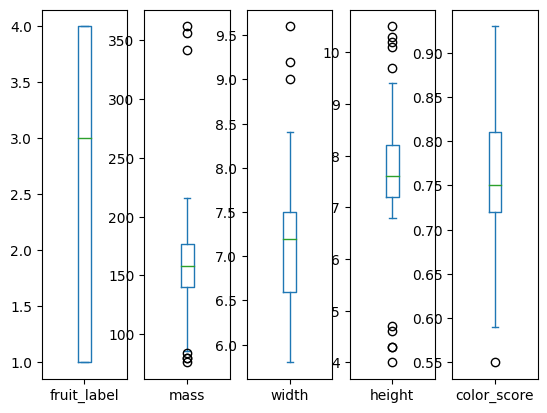

In [19]:
fruits.plot(kind="box", subplots=True, sharex=False, sharey=False)
plt.show()

array([[<Axes: title={'center': 'color_score'}, xlabel='[fruit_name]'>,
        <Axes: title={'center': 'fruit_label'}, xlabel='[fruit_name]'>],
       [<Axes: title={'center': 'height'}, xlabel='[fruit_name]'>,
        <Axes: title={'center': 'mass'}, xlabel='[fruit_name]'>],
       [<Axes: title={'center': 'width'}, xlabel='[fruit_name]'>,
        <Axes: >]], dtype=object)

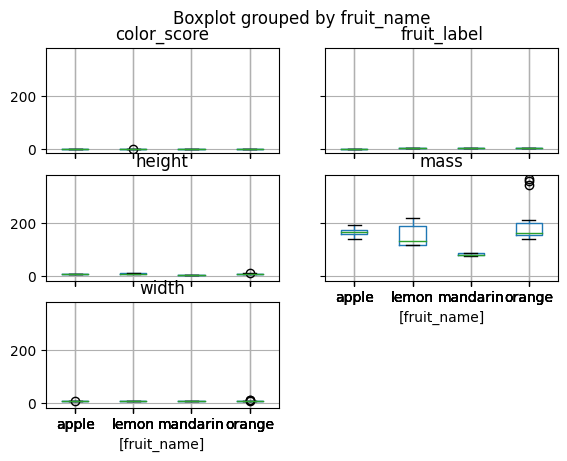

In [21]:
fruits.boxplot(by="fruit_name")

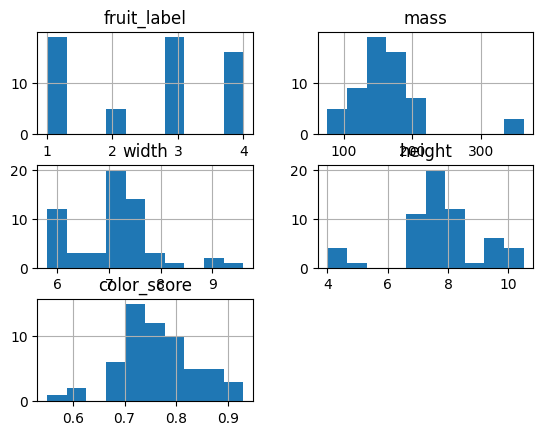

In [22]:
fruits.hist()
plt.show()

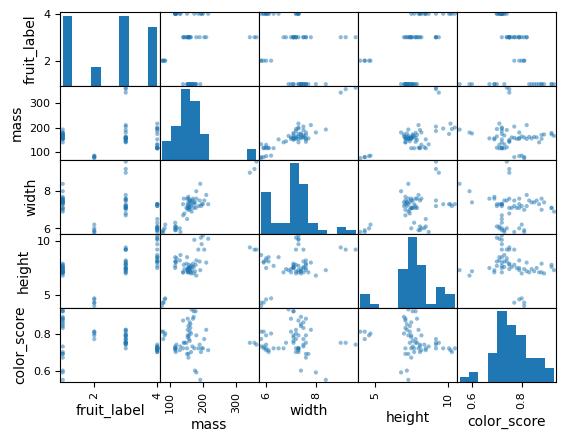

In [23]:
scatter_matrix(fruits)
plt.show()

In [28]:
one_hot = pd.get_dummies(fruits,columns = ['fruit_name','fruit_subtype'])
one_hot.head()

,fruit_label,mass,width,height,color_score,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown
0,1,192,8.4,7.3,0.55,True,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1,180,8.0,6.8,0.59,True,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,176,7.4,7.2,0.60,True,False,False,False,False,False,False,True,False,False,False,False,False,False
3,2,86,6.2,4.7,0.80,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,2,84,6.0,4.6,0.79,False,False,True,False,False,False,False,False,True,False,False,False,False,False


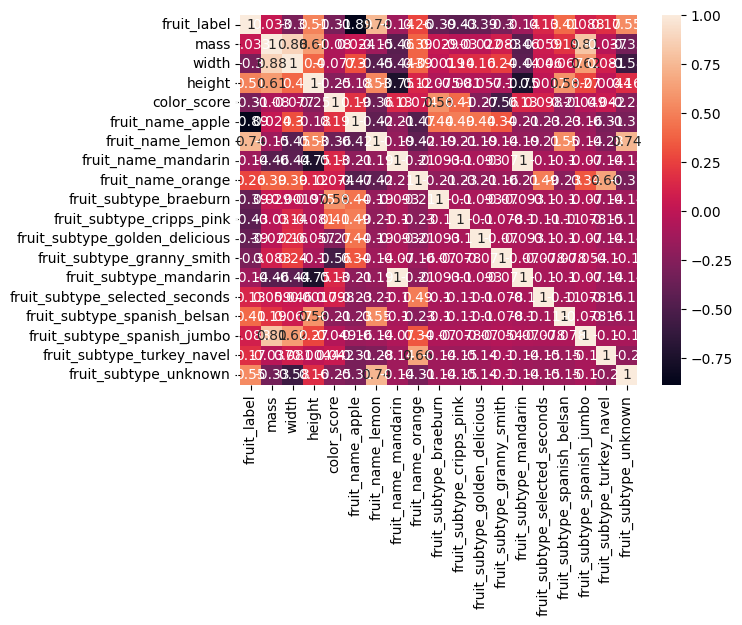

In [29]:
sns.heatmap(one_hot.corr(), annot=True)
plt.show()

In [35]:
X = fruits.drop(['fruit_label', 'fruit_name','fruit_subtype'], axis=1)
y = fruits['fruit_label']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=1)

In [39]:
X_test

,mass,width,height,color_score
49,132,5.8,8.7,0.73
2,176,7.4,7.2,0.60
35,150,7.1,7.9,0.75
47,196,7.3,9.7,0.72
39,144,6.8,7.4,0.75
34,142,7.6,7.8,0.75
38,158,7.2,7.8,0.77
19,162,7.4,7.2,0.85
21,156,7.4,7.4,0.84
52,118,5.9,8.0,0.72


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KMC', KMeans(n_clusters=4, random_state = 0, n_init='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.551136 (0.165576)
KMC: 0.043561 (0.043643)
KNN: 0.890152 (0.116072)
CART: 0.937500 (0.069096)
SVM: 0.361742 (0.034038)
GB: 0.831439 (0.081483)


In [55]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
predictions = cart.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


In [ ]:
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()